In [1]:
pwd

'/content'

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# 현재 경로를 앞으로 진행할 프로젝트 디렉토리로 이동한다.
%cd /content/drive/MyDrive/Colab Notebooks/dna/ 

/content/drive/MyDrive/Colab Notebooks/dna


In [4]:
pwd

'/content/drive/MyDrive/Colab Notebooks/dna'

In [6]:
import glob
'''glob 함수를 이용하면, 해당 경로에 있는 파일들의 경로를 전부 리스트로 얻어올 수 있습니다. glob 라이브러리를 이용하여 이번 과제를 해결해주세요.'''
dolphin_img_list = glob.glob('/content/drive/MyDrive/Colab Notebooks/dna/original-1/original/dolphin/*')
shark_img_list = glob.glob('/content/drive/MyDrive/Colab Notebooks/dna/original-1/original/shark/*')
whale_img_list = glob.glob('/content/drive/MyDrive/Colab Notebooks/dna/original-1/original/whale/*')

dic = {'dolphin':dolphin_img_list, 'shark': shark_img_list, 'whale': whale_img_list}
for key in dic.keys():
  print(f'{key}이미지가 ',len(dic[key]), '개 있습니다.')
print('------------------------------------------------------------------------')

length_list = []
for key in dic.keys():
  print(f'{key}이미지는 trian, valid, test셋에 대해 ',int(len(dic[key])*0.7), int(len(dic[key])*0.2), int(len(dic[key])*0.1), '개씩 배정해주세요.')
  length_list.append([int(len(dic[key])*0.7), int(len(dic[key])*0.2), int(len(dic[key])*0.1)])

dolphin이미지가  373 개 있습니다.
shark이미지가  488 개 있습니다.
whale이미지가  451 개 있습니다.
------------------------------------------------------------------------
dolphin이미지는 trian, valid, test셋에 대해  261 74 37 개씩 배정해주세요.
shark이미지는 trian, valid, test셋에 대해  341 97 48 개씩 배정해주세요.
whale이미지는 trian, valid, test셋에 대해  315 90 45 개씩 배정해주세요.


In [18]:
import os
import glob
import cv2
import time

class Make_dataset_dir():
  def __init__(self, root_dir):
    print("root_dir :", root_dir)
    self.root_path = root_dir+'/' if root_dir[-1] != '/' else root_dir # 현재 진행할 프로젝트
    self.img_path_list = root_dir+'original' # 전달한 이미지들의 상위 경로
    
    self.trainset_path = root_dir+'train/'
    self.validset_path = root_dir+'valid/'
    self.testset_path = root_dir+'test/'
    print("self.trainset_path:", self.trainset_path)
    print("self.validset_path:", self.validset_path)
    print("self.testset_path:", self.testset_path)

    self.class_list = ['dolphin', 'shark', 'whale']

  def mk_dir(self):
    '''train, valid, test 폴더를 만들고, 내부에는 클래스 별 폴더를 추가로 만들어 주세요.'''
    dataset_dir_list = [self.trainset_path, self.validset_path, self.testset_path]
    for dataset_dir in dataset_dir_list:
      for cls in self.class_list:
        os.makedirs(dataset_dir+cls, exist_ok=True)
    print('디렉토리 생성을 완료하였습니다.')
    
  def move_img(self):
    '''mk_dir에서 만든 폴더들에 각 클래스에 맞는 이미지를 배당해주세요. train, valid, test에 각각 7: 2: 1'''
    dolphin_img_list = glob.glob('/content/drive/MyDrive/Colab Notebooks/dna/original-1/original/dolphin/*')
    shark_img_list = glob.glob('/content/drive/MyDrive/Colab Notebooks/dna/original-1/original/shark/*')
    whale_img_list = glob.glob('/content/drive/MyDrive/Colab Notebooks/dna/original-1/original/whale/*')
    
    dic = {'dolphin':dolphin_img_list, 'shark': shark_img_list, 'whale': whale_img_list} # 딕셔너리 생성
    for key in dic.keys():
      length_list.append([int(len(dic[key])*0.7), int(len(dic[key])*0.2), int(len(dic[key])*0.1)]) # 클래스 별 분할 개수 리스트 생성

    for i,key in enumerate(dic.keys()):
      spliting_length = length_list[i]

      for ii, img_path in enumerate(dic[key]):
        if ii+1 <= spliting_length[0] : # train셋 개수이면,
          img = cv2.imread(img_path)
          img_name = img_path.split('/')[-1]
          cv2.imwrite(self.trainset_path + '/' + key + '/' + img_name, img)

        elif spliting_length[0] < ii+1 and ii+1 <= spliting_length[0] + spliting_length[1]: # valid셋 개수이면,
          img = cv2.imread(img_path)
          img_name = img_path.split('/')[-1]
          cv2.imwrite(self.validset_path + '/' + key + '/' + img_name, img)

        else:
          img = cv2.imread(img_path)
          img_name = img_path.split('/')[-1]
          cv2.imwrite(self.testset_path + '/' + key + '/' + img_name, img)
    print('데이터 스플릿이 전부 완료되었습니다.')

  def run(self):
    start = time.time()
    self.mk_dir()
    self.move_img()
    print('총 소요시간: ', time.time()-start)

  def checking_dirs(self):
    path_list = [self.trainset_path, self.validset_path, self.testset_path]
    print("path_list :", path_list)

    for i,path in enumerate(path_list):
      length_dic = {}
      for cls in self.class_list:
        length_dic[cls] = len(glob.glob(path+cls+'/*'))

      if i==0:
        for key in length_dic:
          print( f'trainset의 {key}클래스 개수: {length_dic[key]}')
        print('---------------------------------------------------------------')
      elif i==1:
        for key in length_dic:
          print( f'validset의 {key}클래스 개수: {length_dic[key]}')
        print('---------------------------------------------------------------')
      else:
        for key in length_dic:
          print( f'validset의 {key}클래스 개수: {length_dic[key]}')

# 파이토치 데이터셋 클래스 만들기

# 파이토치 모델만들기

In [20]:
# from ex1 import Make_dataset_dir

In [19]:
inho=Make_dataset_dir('/content/drive/MyDrive/Colab Notebooks/dna/original-1/')
inho.checking_dirs()

root_dir : /content/drive/MyDrive/Colab Notebooks/dna/original-1/
self.trainset_path: /content/drive/MyDrive/Colab Notebooks/dna/original-1/train/
self.validset_path: /content/drive/MyDrive/Colab Notebooks/dna/original-1/valid/
self.testset_path: /content/drive/MyDrive/Colab Notebooks/dna/original-1/test/
path_list : ['/content/drive/MyDrive/Colab Notebooks/dna/original-1/train/', '/content/drive/MyDrive/Colab Notebooks/dna/original-1/valid/', '/content/drive/MyDrive/Colab Notebooks/dna/original-1/test/']
trainset의 dolphin클래스 개수: 0
trainset의 shark클래스 개수: 0
trainset의 whale클래스 개수: 0
---------------------------------------------------------------
validset의 dolphin클래스 개수: 0
validset의 shark클래스 개수: 0
validset의 whale클래스 개수: 0
---------------------------------------------------------------
validset의 dolphin클래스 개수: 0
validset의 shark클래스 개수: 0
validset의 whale클래스 개수: 0


In [21]:
Make_dataset_dir(root_dir='/content/drive/MyDrive/Colab Notebooks/dna/original-1/').run()

Make_dataset_dir(root_dir='/content/drive/MyDrive/Colab Notebooks/dna/original-1/').checking_dirs()

root_dir : /content/drive/MyDrive/Colab Notebooks/dna/original-1/
self.trainset_path: /content/drive/MyDrive/Colab Notebooks/dna/original-1/train/
self.validset_path: /content/drive/MyDrive/Colab Notebooks/dna/original-1/valid/
self.testset_path: /content/drive/MyDrive/Colab Notebooks/dna/original-1/test/
디렉토리 생성을 완료하였습니다.
데이터 스플릿이 전부 완료되었습니다.
총 소요시간:  300.28688526153564
root_dir : /content/drive/MyDrive/Colab Notebooks/dna/original-1/
self.trainset_path: /content/drive/MyDrive/Colab Notebooks/dna/original-1/train/
self.validset_path: /content/drive/MyDrive/Colab Notebooks/dna/original-1/valid/
self.testset_path: /content/drive/MyDrive/Colab Notebooks/dna/original-1/test/
path_list : ['/content/drive/MyDrive/Colab Notebooks/dna/original-1/train/', '/content/drive/MyDrive/Colab Notebooks/dna/original-1/valid/', '/content/drive/MyDrive/Colab Notebooks/dna/original-1/test/']
trainset의 dolphin클래스 개수: 261
trainset의 shark클래스 개수: 341
trainset의 whale클래스 개수: 315
--------------------------------

In [ ]:
pwd

'/content/drive/MyDrive/CV_seminar_project'

# CV2 라이브러리 맛 보기

In [22]:
img[:,:,::-1]

NameError: ignored

In [23]:
img[:,:,::-1] == img[:,:,-1]

NameError: ignored

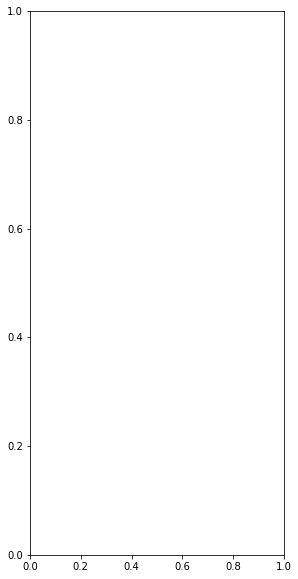

In [26]:
import cv2
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow # cv2.imshow(img)가 안되므로 
from PIL import Image as PILImage

fig = plt.figure(figsize=(10,10))

dolphin_img_list = glob.glob('/content/drive/MyDrive/Colab Notebooks/dna/original-1/original/dolphin/*')
shark_img_list = glob.glob('/content/drive/MyDrive/Colab Notebooks/dna/original-1/original/shark/*')
whale_img_list = glob.glob('/content/drive/MyDrive/Colab Notebooks/dna/original-1/original/whale/*')

img = cv2.imread(dolphin_img_list[0]) # 이미지를 BGR로 읽음
plt.subplot(1,2,1)
# cv2.imshow(img) # 방법 1 -> 에러 남
# plt.imshow(img[:,:,::-1]) # 방법 2 -> RGB로 읽어야 해서 바뀜.
PILImage.open(dolphin_img_list[0]) # 방법 3 -> 경로를 인자로 받아서 바로 읽음

# plt.subplot(1,2,2)
# plt.imshow(img[])

# 3주차 과제 1

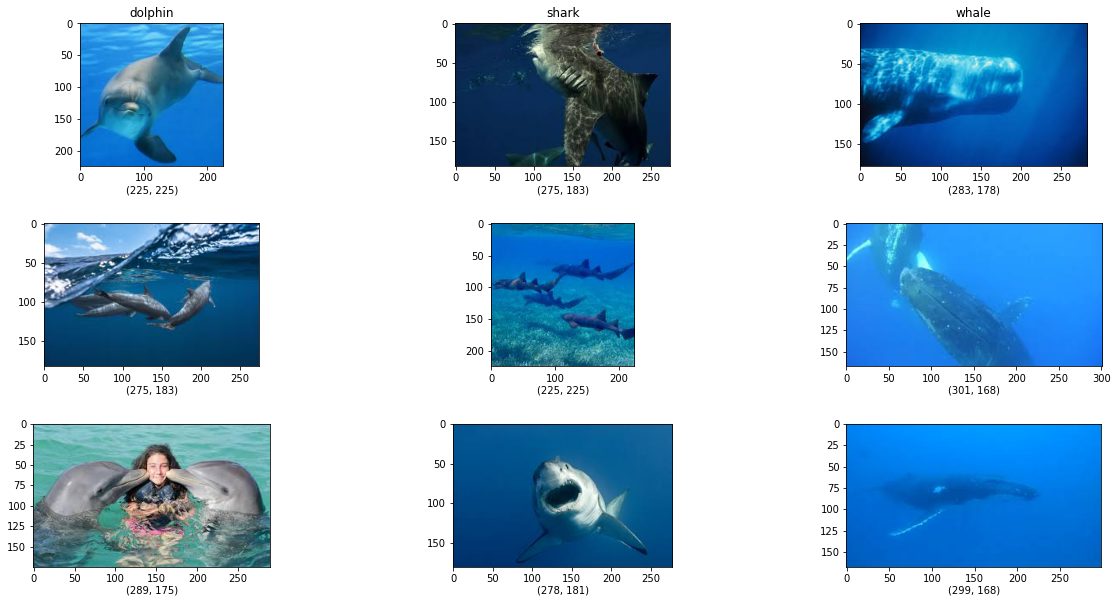

In [103]:
import cv2
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow # cv2.imshow(img)가 안되므로 
from PIL import Image as PILImage
import matplotlib.gridspec as gridspec

dolphin_img_list = glob.glob('/content/drive/MyDrive/Colab Notebooks/dna/original-1/original/dolphin/*')
shark_img_list = glob.glob('/content/drive/MyDrive/Colab Notebooks/dna/original-1/original/shark/*')
whale_img_list = glob.glob('/content/drive/MyDrive/Colab Notebooks/dna/original-1/original/whale/*')


grid = gridspec.GridSpec(3,3)#그래프를 그릴 도화지 개수
plt.figure(figsize=(20,10))
plt.subplots_adjust(wspace= 0.4, hspace=0.4) #그래프 간의 거리 조절

for i in range(3):
  for j in range(3):
    if(i==0):
      ax = plt.subplot(grid[j*3])
      if(j == 0):
        ax.set_title("dolphin")
      image = PILImage.open(dolphin_img_list[j]) # 방법 3 -> 경로를 인자로 받아서 바로 읽음
      ax.imshow(image)
      ax.text(image.size[0]/2,image.size[1]*1.2,image.size,size=10,verticalalignment='bottom' , horizontalalignment='center' )
    if(i==1):
      ax = plt.subplot(grid[j*3+1])
      if(j == 0):
        ax.set_title("shark")
      image = PILImage.open(shark_img_list[j]) # 방법 3 -> 경로를 인자로 받아서 바로 읽음
      ax.imshow(image)
      ax.text(image.size[0]/2,image.size[1]*1.2,image.size,size=10,verticalalignment='bottom' , horizontalalignment='center' )
    if(i==2):
      ax = plt.subplot(grid[j*3+2])
      if(j == 0):
        ax.set_title("whale")
      image = PILImage.open(whale_img_list[j]) # 방법 3 -> 경로를 인자로 받아서 바로 읽음
      ax.imshow(image)
      ax.text(image.size[0]/2,image.size[1]*1.2,image.size,size=10,verticalalignment='bottom' , horizontalalignment='center' )



# 3주차과제 2

(225, 225, 3)


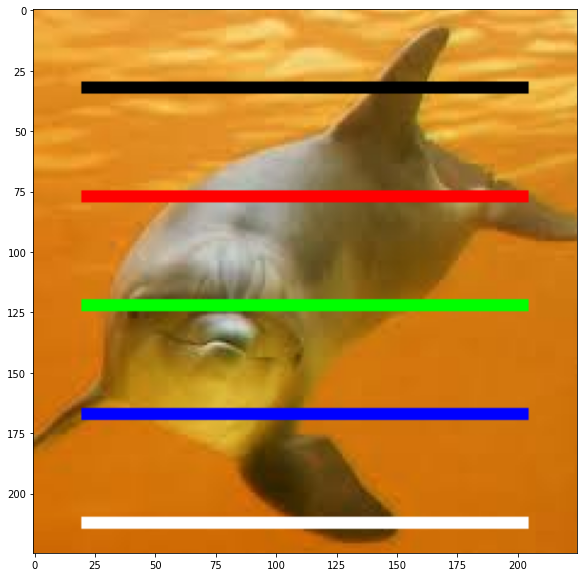

In [139]:
import cv2
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow # cv2.imshow(img)가 안되므로 
from PIL import Image as PILImage
import matplotlib.gridspec as gridspec

dolphin_img_list = glob.glob('/content/drive/MyDrive/Colab Notebooks/dna/original-1/original/dolphin/*')
# shark_img_list = glob.glob('/content/drive/MyDrive/Colab Notebooks/dna/original-1/original/shark/*')
# whale_img_list = glob.glob('/content/drive/MyDrive/Colab Notebooks/dna/original-1/original/whale/*')


grid = gridspec.GridSpec(1,1)#그래프를 그릴 도화지 개수
plt.figure(figsize=(10,10))
plt.subplots_adjust(wspace= 0.4, hspace=0.4) #그래프 간의 거리 조절

ax = plt.subplot(grid[0])
      
img = cv2.imread(dolphin_img_list[0]) # 이미지를 BGR로 읽음
print(img.shape)
# print(img)

h = len(img)/5

h1 = 0+30
h2 = 45+30
h3 = 90+30
h4 = 135+30
h5 = 180+30


# print(len(img)/5)

for i in range(5):
  img[h1+i][20:225-20] = 0,0,0
for i in range(5):
  img[h2+i][20:225-20] = 255,0,0
for i in range(5):
  img[h3+i][20:225-20] = 0,255,0
for i in range(5):
  img[h4+i][20:225-20] = 0,0,255
for i in range(5):
  img[h5+i][20:225-20] = 255,255,255


ax.imshow(img)

